In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [2]:
data_dir = "D:/computer science GIU/semester 6/Introduction to Image Processing and Computer Vision/milestone 3/archive"
train_path = 'D:/computer science GIU/semester 6/Introduction to Image Processing and Computer Vision/milestone 3/archive/Train'
test_path = 'D:/computer science GIU/semester 6/Introduction to Image Processing and Computer Vision/milestone 3/archive/Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3
NUM_CATEGORIES = len(os.listdir(train_path))

In [3]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' 
          }

In [4]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

In [5]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [6]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

In [7]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

In [8]:
learning_rate = 0.001 #Learning rate
epochs = 15 #no. of epochs

opt = Adam(learning_rate=learning_rate, decay=learning_rate / (epochs * 0.5)) #Adam optimization
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) #compile the model

In [48]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=128), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/15
215/215 [==============================] - 107s 498ms/step - loss: 0.0234 - accuracy: 0.9925 - val_loss: 0.0091 - val_accuracy: 0.9973
Epoch 2/15
215/215 [==============================] - 102s 472ms/step - loss: 0.0180 - accuracy: 0.9946 - val_loss: 0.0083 - val_accuracy: 0.9981
Epoch 3/15
215/215 [==============================] - 88s 408ms/step - loss: 0.0106 - accuracy: 0.9964 - val_loss: 0.0071 - val_accuracy: 0.9976
Epoch 4/15
215/215 [==============================] - 105s 489ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.0047 - val_accuracy: 0.9985
Epoch 5/15
215/215 [==============================] - 95s 443ms/step - loss: 0.0065 - accuracy: 0.9977 - val_loss: 0.0025 - val_accuracy: 0.9992
Epoch 6/15
215/215 [==============================] - 102s 475ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.0028 - val_accuracy: 0.9993
Epoch 7/15
215/215 [==============================] - 106s 492ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 0.0031 - v

In [12]:
model.save("model.h5")

In [13]:
model.save_weights("D:/computer science GIU/semester 6/Introduction to Image Processing and Computer Vision/milestone 3/archive/output")

In [14]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = np.argmax(model.predict(X_test),axis=1)

print('Test Data accuracy: ', accuracy_score(labels, pred)*100)

395/395 [==============================] - 11s 28ms/step
Test Data accuracy:  98.13143309580364


In [44]:
"""plt.figure(figsize = (30, 30))

for i in range(30):
    plt.subplot(6, 6, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[i]
    actual = labels[i]
    col = 'g'
    #print(prediction)
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction))
    plt.imshow(X_test[i])
plt.show()"""

"plt.figure(figsize = (30, 30))\n\nfor i in range(30):\n    plt.subplot(6, 6, i + 1)\n    plt.grid(False)\n    plt.xticks([])\n    plt.yticks([])\n    prediction = pred[i]\n    actual = labels[i]\n    col = 'g'\n    #print(prediction)\n    if prediction != actual:\n        col = 'r'\n    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction))\n    plt.imshow(X_test[i])\nplt.show()"

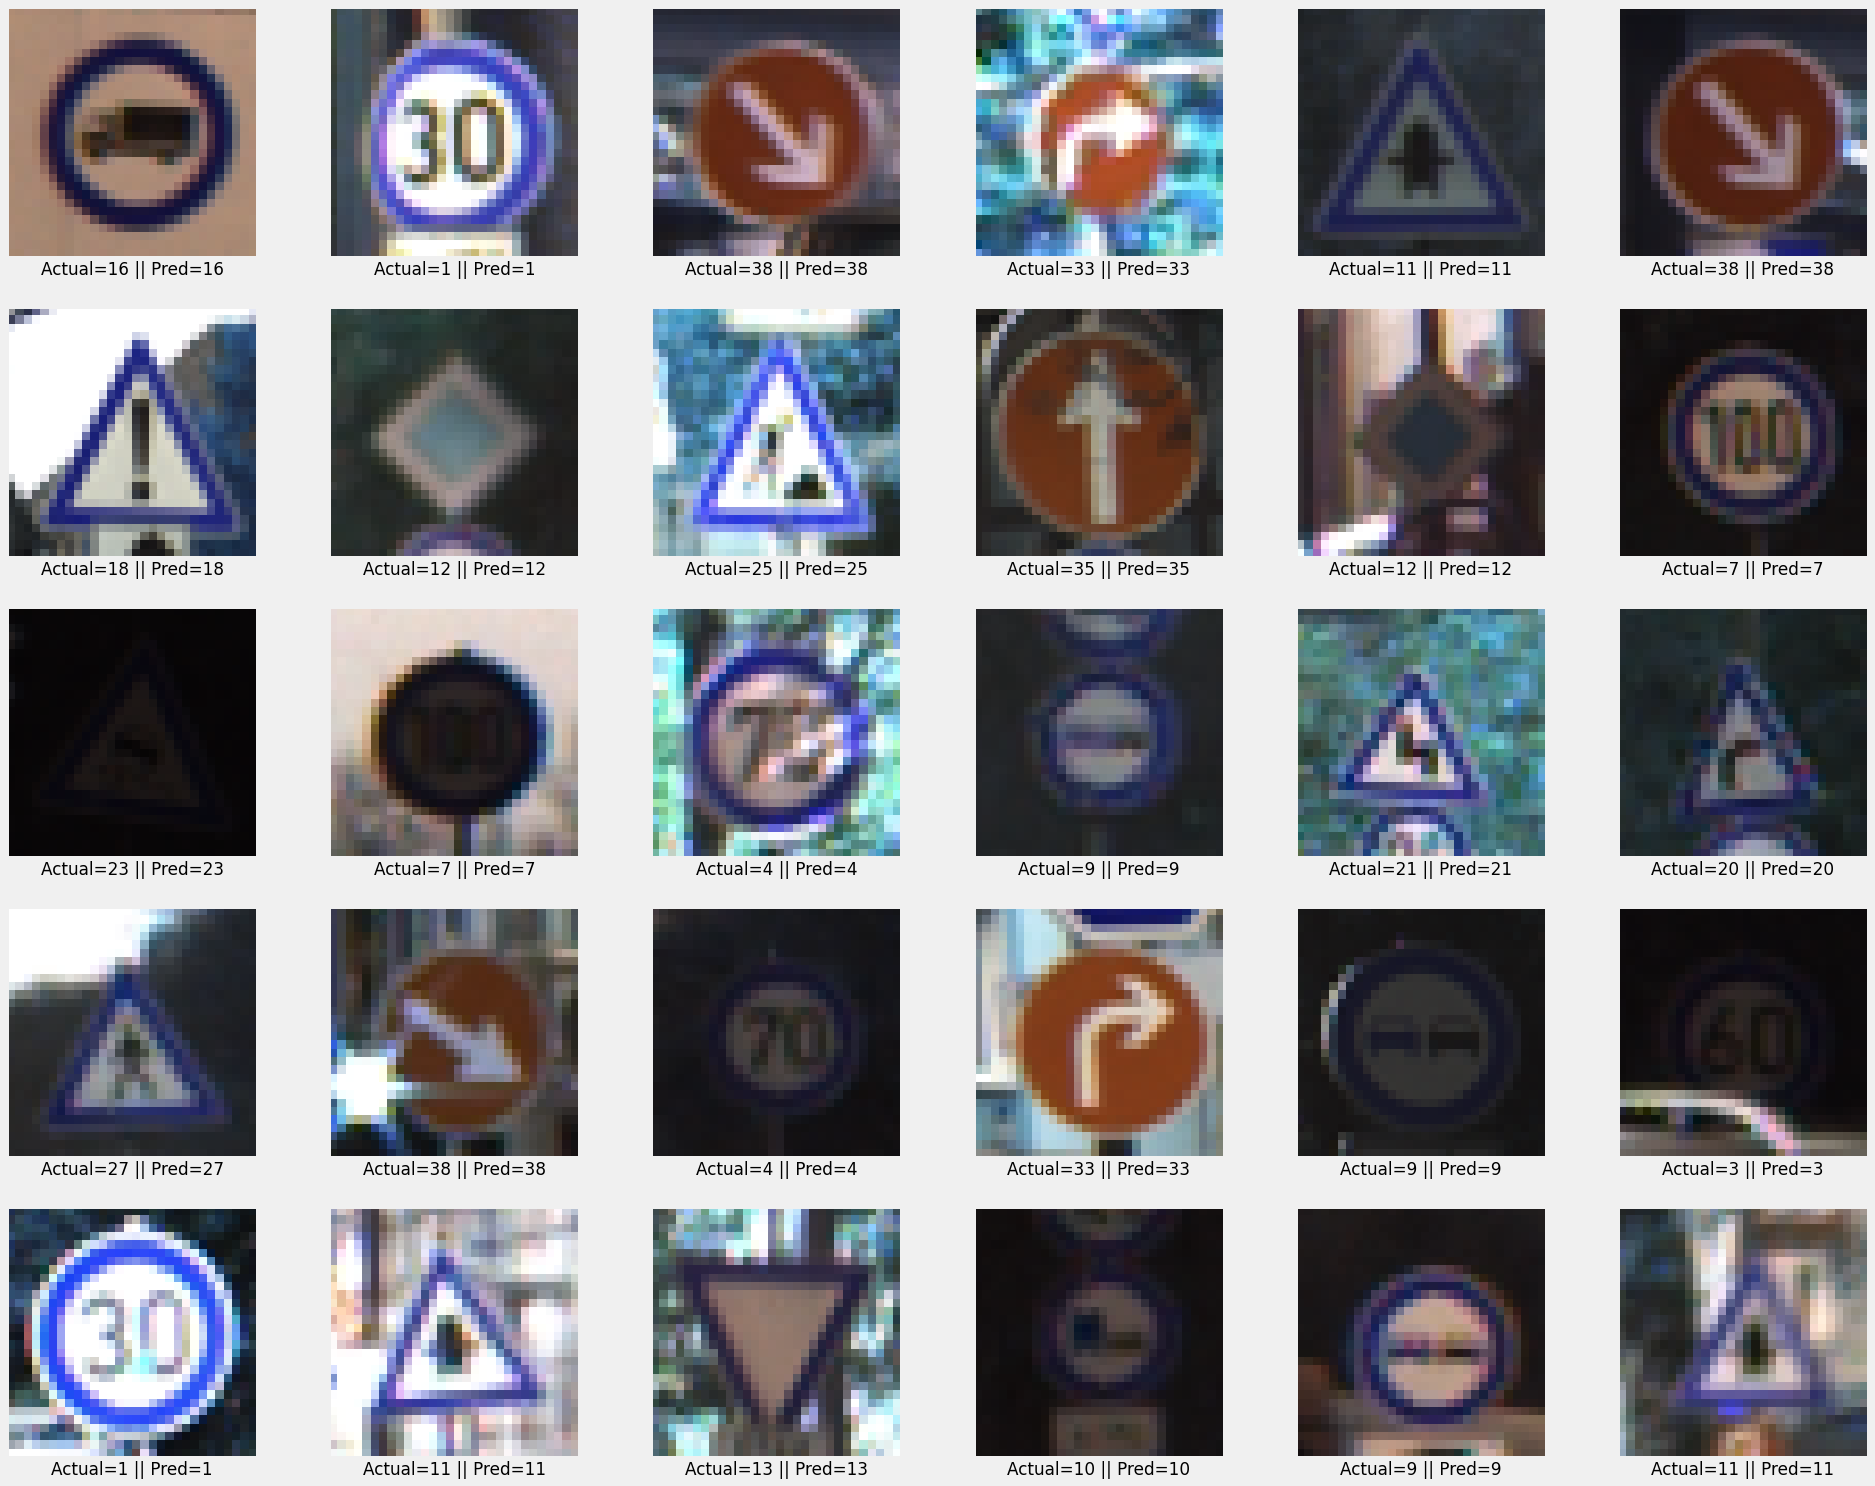

In [45]:
plt.figure(figsize = (30, 30))

for i in range(30):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[i]
    actual = labels[i]
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction))
    plt.imshow(X_test[i])
plt.show()